Code for cleaning the dataset where filename is divided into filename and GenreName



In [ ]:
import pandas as pd

# Load your CSV file
df = pd.read_csv('MAT_samplessdata_400.csv')

# Extract the substring between the second and third underscores
df['GenreName'] = df['Filename'].str.split('_', n=2).str[1]

# Remove the 'Filename' column
df = df.drop(['Filename', 'Tokens'], axis=1)

# Reorder the columns with 'GenreName' as the first column
df = df[['GenreName'] + [col for col in df.columns if col != 'GenreName']]

# Save the modified DataFrame to a new CSV file
df.to_csv('cleaned_data.csv', index=False)

# Display the modified DataFrame
print(df)




      GenreName   AWL  TTR   AMP  ANDC  CAUS  CONC  COND  CONJ  DEMO  ...  \
0          acad  4.69  205  0.19  0.46  0.13  0.05  0.16  0.08  1.32  ...   
1          acad  4.81  233  0.19  1.38  0.12  0.07  0.34  0.12  0.80  ...   
2          acad  4.70  231  0.23  0.87  0.04  0.09  0.14  0.19  0.71  ...   
3          acad  4.31  219  0.02  1.35  0.02  0.05  0.02  0.07  0.59  ...   
4          acad  4.75  242  0.29  1.12  0.16  0.20  0.50  0.37  0.70  ...   
...         ...   ...  ...   ...   ...   ...   ...   ...   ...   ...  ...   
13102      news  4.81  243  0.09  0.90  0.09  0.09  0.27  0.00  0.90  ...   
13103      news  5.12  264  0.00  0.55  0.00  0.00  0.24  0.08  0.47  ...   
13104      news  5.18  247  0.20  0.99  0.00  0.20  0.07  0.13  0.39  ...   
13105      news  5.10  248  0.00  1.24  0.08  0.17  0.00  0.08  1.32  ...   
13106      news  5.31  248  0.45  1.25  0.00  0.00  0.27  0.18  0.72  ...   

       [SPIN]  [STPR]  [SUAV]  [THATD]  [WHCL]  [WHOBJ]  [WHQU]  [WHSUB]  \

In [ ]:
pip install xgboost --upgrade

<ipython-input-2-56d373b5061f>:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  X.columns = X.columns.str.replace('[', '').str.replace(']', '').str.replace('<', '')
<ipython-input-2-56d373b5061f>:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  X.columns = X.columns.str.replace('[', '').str.replace(']', '').str.replace('<', '')


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Accuracy: 0.8225436584935615


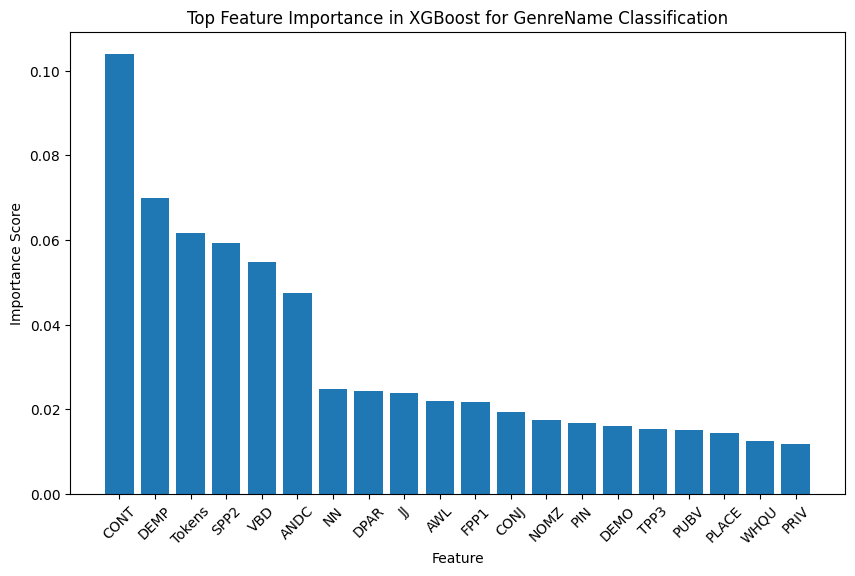

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load your dataset
# Replace 'your_dataset.csv' with your actual dataset file
df = pd.read_csv('cleaned_data.csv')

# Assuming 'GenreName' is your target variable, and other columns are features
X = df.drop('GenreName', axis=1)  # Features
y = df['GenreName']  # Target variable

# Clean feature names
X.columns = X.columns.str.replace('[', '').str.replace(']', '').str.replace('<', '')

# Use LabelEncoder to convert string labels to integer labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
xgb_model = XGBClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Extract the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Convert the predicted labels back to original string labels
y_pred_original = label_encoder.inverse_transform(y_pred)
y_test_original = label_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plot feature importance
feature_importance = best_model.feature_importances_
feature_names = X.columns

sorted_idx = np.argsort(feature_importance)[::-1]
top_features = 20  # You can adjust this number based on your preference

plt.figure(figsize=(10, 6))
plt.bar(range(top_features), feature_importance[sorted_idx][:top_features], align="center")
plt.xticks(range(top_features), np.array(feature_names)[sorted_idx][:top_features], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Top Feature Importance in XGBoost for GenreName Classification")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import joblib
import sys

# Load your dataset
# Replace 'your_dataset.csv' with your actual dataset file
df = pd.read_csv('cleaned_data.csv')

# Assuming 'GenreName' is your target variable, and other columns are features
X = df.drop('GenreName', axis=1)  # Features
y = df['GenreName']  # Target variable

# Clean feature names
X.columns = X.columns.str.replace('[', '').str.replace(']', '').str.replace('<', '')

# Use LabelEncoder to convert string labels to integer labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
xgb_model = XGBClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', verbose=1)

# Redirect stdout to a file
with open('model_training_results.txt', 'w') as file:
    original_stdout = sys.stdout
    sys.stdout = file

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)

    # Extract the best model from the grid search
    best_model = grid_search.best_estimator_

    # Make predictions on the test set using the best model
    y_pred = best_model.predict(X_test)

    # Convert the predicted labels back to original string labels
    y_pred_original = label_encoder.inverse_transform(y_pred)
    y_test_original = label_encoder.inverse_transform(y_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    # Plot feature importance
    feature_importance = best_model.feature_importances_
    feature_names = X.columns

    sorted_idx = np.argsort(feature_importance)[::-1]
    top_features = 20  # You can adjust this number based on your preference

    plt.figure(figsize=(10, 6))
    plt.bar(range(top_features), feature_importance[sorted_idx][:top_features], align="center")
    plt.xticks(range(top_features), np.array(feature_names)[sorted_idx][:top_features], rotation=45)
    plt.xlabel("Feature")
    plt.ylabel("Importance Score")
    plt.title("Top Feature Importance in XGBoost for GenreName Classification")
    plt.savefig('feature_importance_plot.png')  # Save the plot as an image
    plt.close()

    # Reset stdout to the original
    sys.stdout = original_stdout

print("Results saved to model_training_results.txt")


<ipython-input-5-4d596bc3a3fa>:20: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  X.columns = X.columns.str.replace('[', '').str.replace(']', '').str.replace('<', '')
<ipython-input-5-4d596bc3a3fa>:20: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  X.columns = X.columns.str.replace('[', '').str.replace(']', '').str.replace('<', '')


Results saved to model_training_results.txt


include confusion matrix
include precision
include recall score
include ROC curve for different genres

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import joblib
import sys

# Load your dataset
# Replace 'your_dataset.csv' with your actual dataset file
df = pd.read_csv('cleaned_data.csv')

# Assuming 'GenreName' is your target variable, and other columns are features
X = df.drop('GenreName', axis=1)  # Features
y = df['GenreName']  # Target variable

# Clean feature names
X.columns = X.columns.str.replace('[', '').str.replace(']', '').str.replace('<', '')

# Use LabelEncoder to convert string labels to integer labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
xgb_model = XGBClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', verbose=1)

# Create a DataFrame to store intermediate results
intermediate_results = pd.DataFrame(columns=['Feature', 'Best_Params'])

# Redirect stdout to a file
with open('model_training_results.txt', 'w') as file:
    original_stdout = sys.stdout
    sys.stdout = file

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)

    # Extract the best model from the grid search
    best_model = grid_search.best_estimator_

    # Make predictions on the test set using the best model
    y_pred = best_model.predict(X_test)

    # Convert the predicted labels back to original string labels
    y_pred_original = label_encoder.inverse_transform(y_pred)
    y_test_original = label_encoder.inverse_transform(y_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    # Plot feature importance
    feature_importance = best_model.feature_importances_
    feature_names = X.columns

    sorted_idx = np.argsort(feature_importance)[::-1]
    top_features = 20  # You can adjust this number based on your preference

    plt.figure(figsize=(10, 6))
    plt.bar(range(top_features), feature_importance[sorted_idx][:top_features], align="center")
    plt.xticks(range(top_features), np.array(feature_names)[sorted_idx][:top_features], rotation=45)
    plt.xlabel("Feature")
    plt.ylabel("Importance Score")
    plt.title("Top Feature Importance in XGBoost for GenreName Classification")
    plt.savefig('feature_importance_plot.png')  # Save the plot as an image
    plt.close()

    # Save intermediate results for each feature
    for feature, params in zip(X.columns, grid_search.cv_results_['params']):
        intermediate_results = intermediate_results.append({'Feature': feature, 'Best_Params': params}, ignore_index=True)

    # Reset stdout to the original
    sys.stdout = original_stdout

# Save intermediate results to a CSV file
intermediate_results.to_csv('intermediate_results.csv', index=False)

print("Results saved to model_training_results.txt and intermediate_results.csv")


<ipython-input-7-1b6d5010f02c>:20: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  X.columns = X.columns.str.replace('[', '').str.replace(']', '').str.replace('<', '')
<ipython-input-7-1b6d5010f02c>:20: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  X.columns = X.columns.str.replace('[', '').str.replace(']', '').str.replace('<', '')


Results saved to model_training_results.txt and intermediate_results.csv


<ipython-input-7-1b6d5010f02c>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  intermediate_results = intermediate_results.append({'Feature': feature, 'Best_Params': params}, ignore_index=True)
<ipython-input-7-1b6d5010f02c>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  intermediate_results = intermediate_results.append({'Feature': feature, 'Best_Params': params}, ignore_index=True)
<ipython-input-7-1b6d5010f02c>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  intermediate_results = intermediate_results.append({'Feature': feature, 'Best_Params': params}, ignore_index=True)
<ipython-input-7-1b6d5010f02c>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import joblib
import sys

# Load your dataset
# Replace 'your_dataset.csv' with your actual dataset file
df = pd.read_csv('cleaned_data.csv')

# Assuming 'GenreName' is your target variable, and other columns are features
X = df.drop('GenreName', axis=1)  # Features
y = df['GenreName']  # Target variable

# Clean feature names
X.columns = X.columns.str.replace('[', '').str.replace(']', '').str.replace('<', '')

# Use LabelEncoder to convert string labels to integer labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
xgb_model = XGBClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', verbose=1)

# Create a DataFrame to store intermediate results
intermediate_results = pd.DataFrame(columns=['Feature', 'Best_Params'])

# Redirect stdout to a file
with open('model_training_results.txt', 'w') as file:
    original_stdout = sys.stdout
    sys.stdout = file

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)

    # Extract the best model from the grid search
    best_model = grid_search.best_estimator_

    # Make predictions on the test set using the best model
    y_pred = best_model.predict(X_test)

    # Convert the predicted labels back to original string labels
    y_pred_original = label_encoder.inverse_transform(y_pred)
    y_test_original = label_encoder.inverse_transform(y_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass classification
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {accuracy}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"F1 Score: {f1}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Extract TP, TN, FP, FN from confusion matrix
    TP = cm.diagonal()
    FP = cm.sum(axis=0) - TP
    FN = cm.sum(axis=1) - TP
    TN = cm.sum() - (TP + FP + FN)

    print(f"True Positives (TP): {TP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")

    # Plot feature importance
    feature_importance = best_model.feature_importances_
    feature_names = X.columns

    sorted_idx = np.argsort(feature_importance)[::-1]
    top_features = 20  # You can adjust this number based on your preference

    plt.figure(figsize=(10, 6))
    plt.bar(range(top_features), feature_importance[sorted_idx][:top_features], align="center")
    plt.xticks(range(top_features), np.array(feature_names)[sorted_idx][:top_features], rotation=45)
    plt.xlabel("Feature")
    plt.ylabel("Importance Score")
    plt.title("Top Feature Importance in XGBoost for GenreName Classification")
    plt.savefig('feature_importance_plot.png')  # Save the plot as an image
    plt.close()

    # Plot ROC Curve for each class
    classes = np.unique(y_test)
    plt.figure(figsize=(8, 8))

    for i in range(len(classes)):
        fpr, tpr, _ = roc_curve(y_test == classes[i], y_pred == classes[i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'ROC Curve (Class {classes[i]}) (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Each Class')
    plt.legend()
    plt.savefig('roc_curve.png')  # Save the ROC curve plot as an image
    plt.close()

    # Plot ROC Curve for each set of best parameters
    for params in grid_search.cv_results_['params']:
        xgb_model = XGBClassifier(**params)
        xgb_model.fit(X_train, y_train)
        y_pred_prob = xgb_model.predict_proba(X_test)

        plt.figure(figsize=(8, 8))
        for i in range(len(classes)):
            fpr, tpr, _ = roc_curve(y_test == classes[i], y_pred_prob[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'ROC Curve (Class {classes[i]}) (AUC = {roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for Best Parameters: {params}')
        plt.legend()
        plt.savefig(f'roc_curve_{params}.png')  # Save the ROC curve plot as an image
        plt.close()

    # Save intermediate results, confusion matrix, evaluation metrics, and ROC curves to CSV files
    intermediate_results.to_csv('intermediate_results.csv', index=False)
    np.savetxt("confusion_matrix.csv", cm, delimiter=",")
    with open('evaluation_metrics.txt', 'w') as file:
        file.write(f"Accuracy: {accuracy}\n")
        file.write(f"Recall: {recall}\n")
        file.write(f"Precision: {precision}\n")
        file.write(f"F1 Score: {f1}\n")
        file.write(f"True Positives (TP): {TP}\n")
        file.write(f"True Negatives (TN): {TN}\n")
        file.write(f"False Positives (FP): {FP}\n")
        file.write(f"False Negatives (FN): {FN}\n")

    # Reset stdout to the original
    sys.stdout = original_stdout

print("Results saved to model_training_results.txt, intermediate_results.csv, confusion_matrix.csv, evaluation_metrics.txt, and roc_curve.png")

<ipython-input-2-3370b05b1cc3>:20: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  X.columns = X.columns.str.replace('[', '').str.replace(']', '').str.replace('<', '')
<ipython-input-2-3370b05b1cc3>:20: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  X.columns = X.columns.str.replace('[', '').str.replace(']', '').str.replace('<', '')


Results saved to model_training_results.txt, intermediate_results.csv, confusion_matrix.csv, evaluation_metrics.txt, and roc_curve.png


In [ ]:
import pickle

model_filename = 'xgboost_genre_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(xgb_model, model_file)
print(f"Model saved to {model_filename}")


Model saved to xgboost_genre_model.pkl
